In [1]:
import os
import holidays 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import pandas_ta as ta
import numpy as np
from statsmodels.tsa.stattools import adfuller

data = '2012-12-30'

path_stock = "../data/stock"
path_fed = "../data/fed"

# Top 10 Tech Companies based on Market Cap

In [2]:
AAPL_df = pd.read_csv(f"{path_stock}/AAPL_stock.csv")
MSFT_df = pd.read_csv(f"{path_stock}/MSFT_stock.csv")
GOOGL_df = pd.read_csv(f"{path_stock}/GOOGL_stock.csv")
NVDA_df = pd.read_csv(f"{path_stock}/NVDA_stock.csv")
AMZN_df = pd.read_csv(f"{path_stock}/AMZN_stock.csv")
META_df = pd.read_csv(f"{path_stock}/META_stock.csv")
TSLA_df = pd.read_csv(f"{path_stock}/TSLA_stock.csv")
AVGO_df = pd.read_csv(f"{path_stock}/AVGO_stock.csv")
AMD_df = pd.read_csv(f"{path_stock}/AMD_stock.csv")
CRM_df = pd.read_csv(f"{path_stock}/CRM_stock.csv")

In [3]:
['date', 'close_AAPL', 'high_AAPL', 'low_AAPL', 'open_AAPL',
       'volume_AAPL', 'delta_price_AAPL', 'avg_price_AAPL', 'price_ratio_AAPL',
       'invest_AAPL']
['date', 'close_MSFT', 'high_MSFT', 'low_MSFT', 'open_MSFT',
       'volume_MSFT', 'delta_price_MSFT', 'avg_price_MSFT', 'price_ratio_MSFT',
       'invest_MSFT']
['date', 'close_GOOGL', 'high_GOOGL', 'low_GOOGL', 'open_GOOGL',
       'volume_GOOGL', 'delta_price_GOOGL', 'avg_price_GOOGL',
       'price_ratio_GOOGL', 'invest_GOOGL']
['date', 'close_NVDA', 'high_NVDA', 'low_NVDA', 'open_NVDA',
       'volume_NVDA', 'delta_price_NVDA', 'avg_price_NVDA', 'price_ratio_NVDA',
       'invest_NVDA']
['date', 'close_AMZN', 'high_AMZN', 'low_AMZN', 'open_AMZN',
       'volume_AMZN', 'delta_price_AMZN', 'avg_price_AMZN', 'price_ratio_AMZN',
       'invest_AMZN']
['date', 'close_META', 'high_META', 'low_META', 'open_META',
       'volume_META', 'delta_price_META', 'avg_price_META', 'price_ratio_META',
       'invest_META']
['date', 'close_TSLA', 'high_TSLA', 'low_TSLA', 'open_TSLA',
       'volume_TSLA', 'delta_price_TSLA', 'avg_price_TSLA', 'price_ratio_TSLA',
       'invest_TSLA']
['date', 'close_AVGO', 'high_AVGO', 'low_AVGO', 'open_AVGO',
       'volume_AVGO', 'delta_price_AVGO', 'avg_price_AVGO', 'price_ratio_AVGO',
       'invest_AVGO']
['date', 'close_AMD', 'high_AMD', 'low_AMD', 'open_AMD', 'volume_AMD',
       'delta_price_AMD', 'avg_price_AMD', 'price_ratio_AMD', 'invest_AMD']

['date', 'close_CRM', 'high_CRM', 'low_CRM', 'open_CRM', 'volume_CRM',
       'delta_price_CRM', 'avg_price_CRM', 'price_ratio_CRM', 'invest_CRM']

['invest_AAPL' , 'invest_MSFT', 'invest_GOOGL', 'invest_NVDA', 'invest_AMZN', 'invest_META','invest_TSLA','invest_AVGO','invest_AMD','invest_CRM']


['invest_AAPL',
 'invest_MSFT',
 'invest_GOOGL',
 'invest_NVDA',
 'invest_AMZN',
 'invest_META',
 'invest_TSLA',
 'invest_AVGO',
 'invest_AMD',
 'invest_CRM']

## Tach companies stock Data Frame processing
- Remove the null / header
- Make some features Engineering
- Change the column name
- Change the time type

In [4]:
import pandas as pd

def process_stock_data(df, ticker_symbol):
    """
    Processes a stock data DataFrame.

    Args:
        df (pd.DataFrame): DataFrame with stock data (Price, Close, High, Low, Open, Volume, Ticker).
        ticker_symbol (str): Stock ticker symbol (e.g., 'AAPL').

    Returns:
        pd.DataFrame: Processed DataFrame with calculated features and renamed columns.
    """
    df.dropna(inplace=True)  # Remove rows containing any missing values.

    columns_to_convert = ['Close', 'High', 'Low', 'Open', 'Volume']
    df[columns_to_convert] = df[columns_to_convert].astype(float)  # Convert specified price/volume columns to floating-point numbers.

    # Calculate new features based on price data:
    df["delta_price"] = df["High"] - df["Low"]  # Calculate the difference between the high and low price for each day.
    df["avg_price"] = (df["Close"] + df["High"] + df["Low"] + df["Open"]) / 4  # Calculate the average of the close, high, low, and open prices.
    df["price_ratio"] = df["delta_price"] / df["avg_price"]  # Calculate the ratio of the delta price to the average price.
    df["invest"] = df["Volume"] * df["avg_price"]  # Calculate the difference between the trading volume and the average price (note: this might not be a standard financial metric and could be re-evaluated).

    # Rename the columns for clarity and to include the ticker symbol:
    df.rename(columns={"Price": "date",  # Rename the 'Price' column to 'date'.
                        "Close": f"close_{ticker_symbol}",  # Rename 'Close' to 'cl_ticker'.
                        "High": f"high_{ticker_symbol}",  # Rename 'High' to 'hi_ticker'.
                        "Low": f"low_{ticker_symbol}",  # Rename 'Low' to 'lo_ticker'.
                        "Open": f"open_{ticker_symbol}",  # Rename 'Open' to 'op_ticker'.
                        "delta_price": f"delta_price_{ticker_symbol}",  # Rename 'delta_price' to 'de_ticker'.
                        "avg_price": f"avg_price_{ticker_symbol}",  # Rename 'avg_price' to 'av_ticker'.
                        "invest": f"invest_{ticker_symbol}",  # Rename 'invest' to 'va_ticker'.
                        "price_ratio": f"price_ratio_{ticker_symbol}",  # Rename 'ratio' to 'ra_ticker'.
                        'Volume': f'volume_{ticker_symbol}'}, inplace=True)  # Rename 'Volume' to 'Vo_ticker'.

    df['date'] = pd.to_datetime(df['date'])  # Convert the 'date' column to datetime objects for proper time series handling.

    df.reset_index(drop=True, inplace=True)  # Reset the DataFrame's index to a default integer index and drop the original index.

    # Drop the 'Ticker' column as the ticker information is now embedded in the column names:
    if 'Ticker' in df.columns:
        df.drop('Ticker', axis=1, inplace=True)

    return df  # Return the processed DataFrame.

### Tech companies stock clean Data Frame 

In [5]:
AAPL_clean_df = process_stock_data(AAPL_df, 'AAPL')
MSFT_clean_df = process_stock_data(MSFT_df, 'MSFT')
GOOGL_clean_df = process_stock_data(GOOGL_df, 'GOOGL')
NVDA_clean_df = process_stock_data(NVDA_df, 'NVDA')
AMZN_clean_df = process_stock_data(AMZN_df, 'AMZN')
META_clean_df = process_stock_data(META_df, 'META')
TSLA_clean_df = process_stock_data(TSLA_df, 'TSLA')
AVGO_clean_df = process_stock_data(AVGO_df, 'AVGO')
AMD_clean_df = process_stock_data(AMD_df, 'AMD')
CRM_clean_df = process_stock_data(CRM_df, 'CRM')

###  Find the Max and Min od Data column in each companies stock Data Frame

In [6]:
stock_data_ranges = {}

dataframes = {
    "AAPL": AAPL_clean_df,
    "MSFT": MSFT_clean_df,
    "GOOGL": GOOGL_clean_df,
    "NVDA": NVDA_clean_df,
    "AMZN": AMZN_clean_df,
    "META": META_clean_df,
    "TSLA": TSLA_clean_df,
    "AVGO": AVGO_clean_df,
    "AMD": AMD_clean_df,
    "CRM": CRM_clean_df,
}

for name, df in dataframes.items():
    if 'date' in df.columns:
        min_date = df['date'].min()
        max_date = df['date'].max()
        stock_data_ranges[name] = {'min_date': min_date, 'max_date': max_date}
    else:
        print(f"Warning: 'date' column not found in {name}_clean_df")

# Create a Pandas DataFrame to display the results
date_range_df = pd.DataFrame.from_dict(stock_data_ranges, orient='index')
date_range_df.index.name = 'Stock'

print(date_range_df)

        min_date   max_date
Stock                      
AAPL  2000-01-03 2025-04-21
MSFT  2000-01-03 2025-04-21
GOOGL 2004-08-19 2025-04-21
NVDA  2000-01-03 2025-04-21
AMZN  2000-01-03 2025-04-21
META  2012-05-18 2025-04-21
TSLA  2010-06-29 2025-04-21
AVGO  2009-08-06 2025-04-21
AMD   2000-01-03 2025-04-21
CRM   2004-06-23 2025-04-21


In above result , It seems that the META is started from 2012 while almost the others started from 2000.

## Macro Indicators from Yahoo Finance:
- Indices
- Commodities
- Sector ETFs (Proxies)
- Other Market Metrics

In [7]:
macro_df = pd.read_csv(f"{path_stock}/macro_indicators_full.csv")
# Convert the 'date' column to datetime objects
macro_df['Date'] = pd.to_datetime(macro_df['Date'])
macro_df.rename(columns={"Date": "date"}, inplace=True)

In [8]:
macro_df.isnull().sum()

date                            0
S&P500_Index                    0
Dow_Jones_Index                 0
NASDAQ_Composite                0
Russell2000_Index               0
VIX_Index                       0
Dollar_Index_DXY                2
Gold_Futures                  186
WTI_Oil_Futures               177
Copper_Futures                185
Brent_Crude_Futures          1957
Tech_Sector_ETF                 0
Energy_Sector_ETF               0
Financial_Sector_ETF            0
ConsumerDiscretionary_ETF       0
Lithium_ETF                  2654
Semiconductor_ETF             106
Electricity_Proxy               0
dtype: int64

Data Frame : macro_df ---> Has some missing values that need to be check according to the time. 

Let Filter the time after the '2012-05-31'. This is exactly after the time which we have the META stock data frame. 

In [9]:
macro_df_filter = macro_df[macro_df['date'] > data ]
min_date_macro_df_filter = macro_df_filter['date'].min()
max_date_macro_df_filter = macro_df_filter['date'].max()
macro_df_filter.isnull().sum()

date                          0
S&P500_Index                  0
Dow_Jones_Index               0
NASDAQ_Composite              0
Russell2000_Index             0
VIX_Index                     0
Dollar_Index_DXY              2
Gold_Futures                  3
WTI_Oil_Futures               2
Copper_Futures                3
Brent_Crude_Futures          13
Tech_Sector_ETF               0
Energy_Sector_ETF             0
Financial_Sector_ETF          0
ConsumerDiscretionary_ETF     0
Lithium_ETF                   0
Semiconductor_ETF             0
Electricity_Proxy             0
dtype: int64

In [10]:
#macro_df_filter = macro_df_filter.drop('Brent_Crude_Futures',axis=1)

<Figure size 1000x600 with 0 Axes>

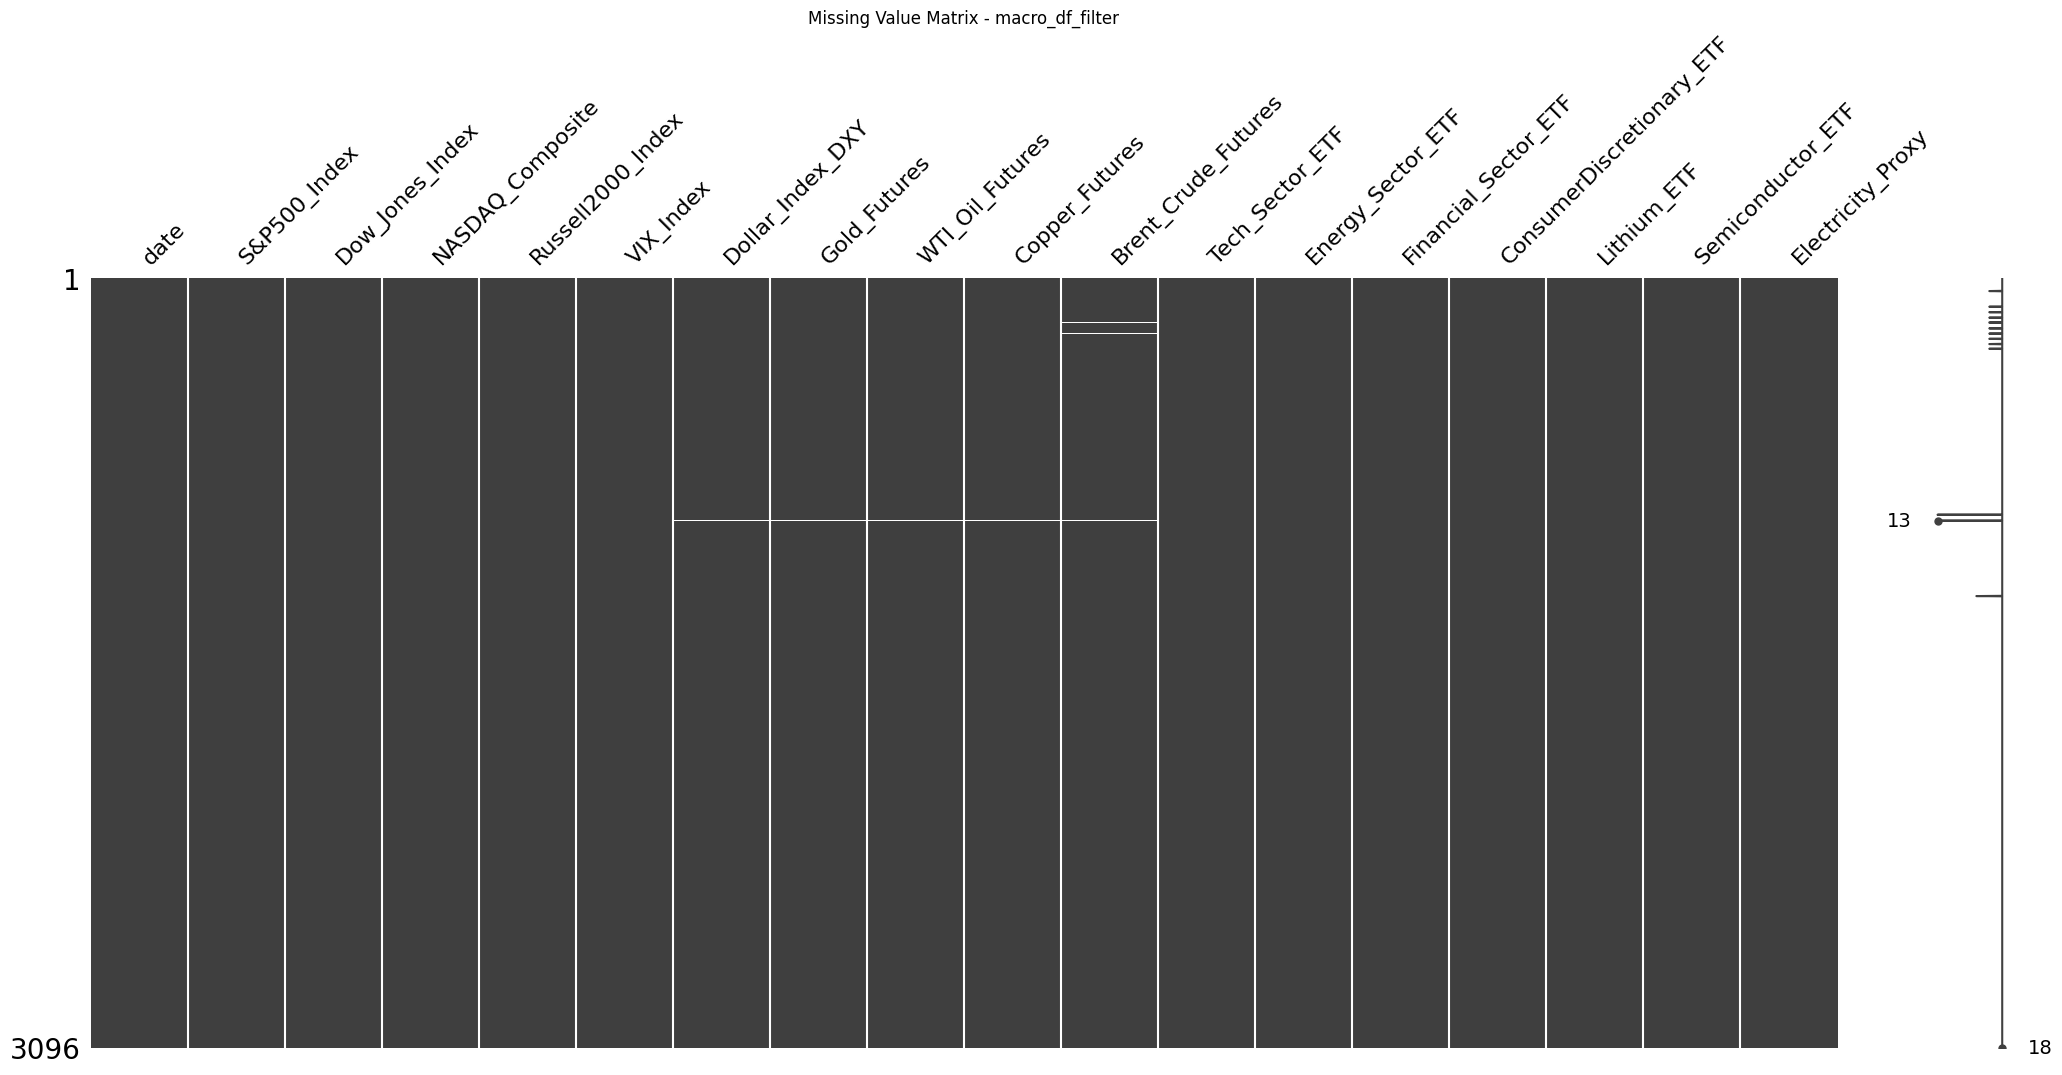

In [11]:
df = macro_df_filter
data_name = 'macro_df_filter'
# 1. Matrix Plot: Visualize the pattern of missingness
plt.figure(figsize=(10, 6))
msno.matrix(df)
plt.title(f'Missing Value Matrix - {data_name}')
plt.show()

In [12]:
macro_clean_df = macro_df_filter.dropna()
macro_clean_df.isnull().sum()

date                         0
S&P500_Index                 0
Dow_Jones_Index              0
NASDAQ_Composite             0
Russell2000_Index            0
VIX_Index                    0
Dollar_Index_DXY             0
Gold_Futures                 0
WTI_Oil_Futures              0
Copper_Futures               0
Brent_Crude_Futures          0
Tech_Sector_ETF              0
Energy_Sector_ETF            0
Financial_Sector_ETF         0
ConsumerDiscretionary_ETF    0
Lithium_ETF                  0
Semiconductor_ETF            0
Electricity_Proxy            0
dtype: int64

# Fed Data frame

In [13]:
fed_df = pd.read_csv(f"{path_fed}/combined_economic_indicators.csv")

# Rename the 'Unnamed: 0' column to 'date'
fed_df.rename(columns={'Unnamed: 0': 'date'}, inplace=True)

# Convert the 'date' column to datetime objects
fed_df['date'] = pd.to_datetime(fed_df['date'])

In [14]:
fed_df.isnull().sum()

date                       0
cpi                        0
fed_rate                   0
vix                       33
oil                       47
gdp                      101
nonfarm_payrolls           0
treasury_yield            24
industrial_production      0
retail_sales               0
pmi                        0
consumer_confidence       19
day_of_week                0
is_holiday                 0
is_working_day             0
dtype: int64

In [15]:
fed_df_filter = fed_df[fed_df['date'] > data]
min_date_fed_df_filter = fed_df_filter['date'].min()
max_date_fed_df_filter = fed_df_filter['date'].max()
fed_df_filter.isnull().sum()

date                       0
cpi                        0
fed_rate                   0
vix                       13
oil                       20
gdp                      101
nonfarm_payrolls           0
treasury_yield            10
industrial_production      0
retail_sales               0
pmi                        0
consumer_confidence       19
day_of_week                0
is_holiday                 0
is_working_day             0
dtype: int64

<Figure size 1000x600 with 0 Axes>

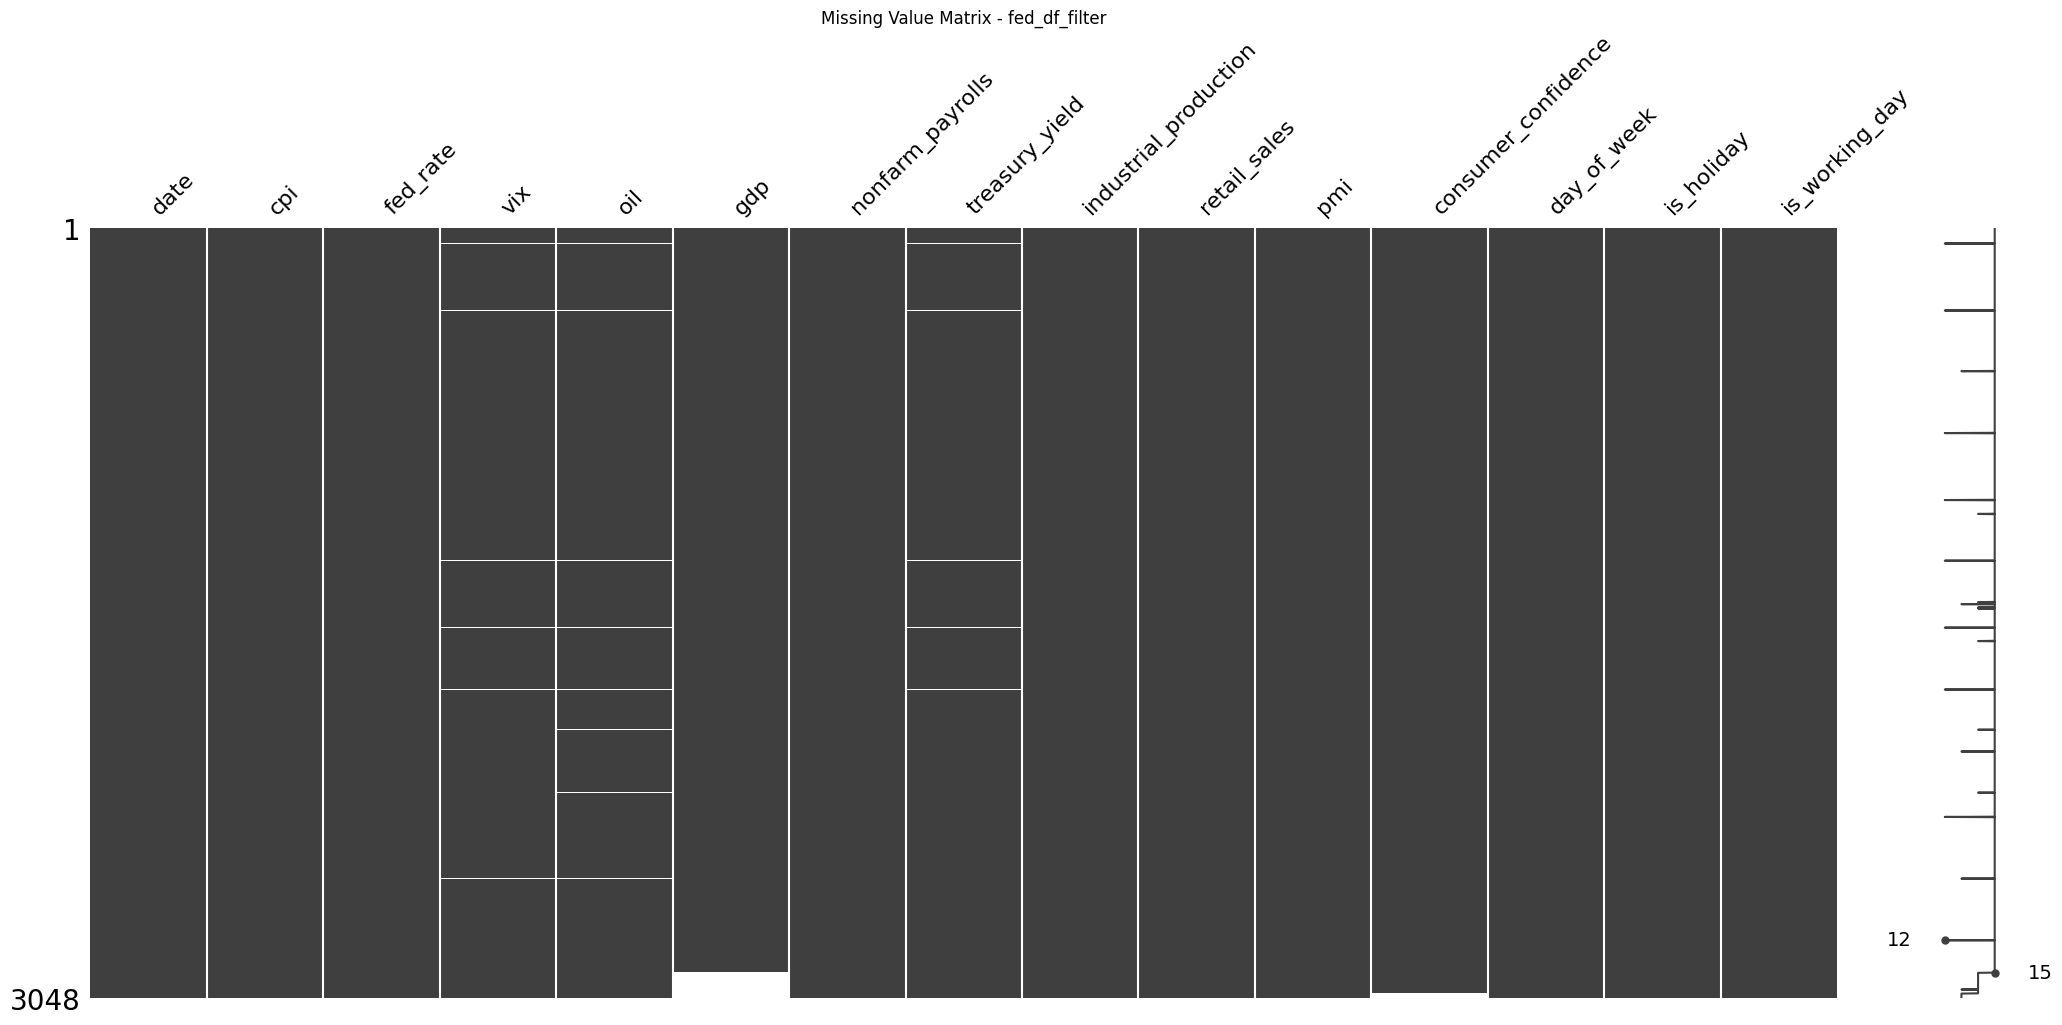

In [16]:
df = fed_df_filter
data_name = 'fed_df_filter'
# 1. Matrix Plot: Visualize the pattern of missingness
plt.figure(figsize=(10, 6))
msno.matrix(df)
plt.title(f'Missing Value Matrix - {data_name}')
plt.show()

In [17]:
fed_clean_df = fed_df_filter[['date', 'cpi', 'fed_rate', 'consumer_confidence','vix', 'oil', 'nonfarm_payrolls',
       'treasury_yield', 'industrial_production', 'retail_sales', 'pmi',
        'day_of_week', 'is_holiday', 'is_working_day']].dropna()
fed_clean_df.isnull().sum()

date                     0
cpi                      0
fed_rate                 0
consumer_confidence      0
vix                      0
oil                      0
nonfarm_payrolls         0
treasury_yield           0
industrial_production    0
retail_sales             0
pmi                      0
day_of_week              0
is_holiday               0
is_working_day           0
dtype: int64

# Merging the Date Frames

In [18]:
# Start with the first DataFrame
merged_stock_data = AAPL_clean_df.copy()

# List of stock DataFrames (excluding the first one)
stock_dfs = [MSFT_clean_df, GOOGL_clean_df, NVDA_clean_df, AMZN_clean_df,
             META_clean_df, TSLA_clean_df, AVGO_clean_df, AMD_clean_df, CRM_clean_df]

# Merge each stock DataFrame on 'date' using a left join
for df in stock_dfs:
    merged_stock_data = pd.merge(merged_stock_data, df, on='date', how='inner')

# 2. Merge with Macro and Fed DataFrames

# Merge stock data with macro data
merged_data = pd.merge(merged_stock_data, macro_clean_df, on='date', how='inner')

# Merge with fed data
final_merged_df = pd.merge(merged_data, fed_clean_df, on='date', how='inner')

stock_df = merged_stock_data
stock_macro_df = merged_data
stock_macro_fed_df = final_merged_df

# Top 10 Companies Investment over Time

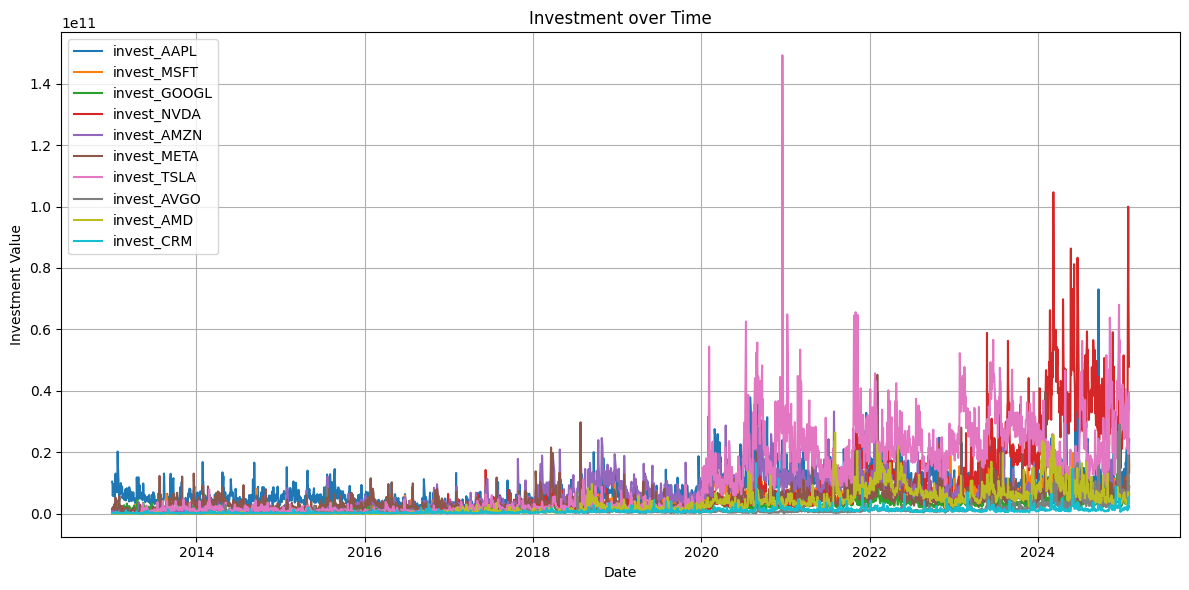

In [19]:
stock_plot = stock_macro_fed_df[[
    'date',
    'invest_AAPL','invest_MSFT','invest_GOOGL','invest_NVDA','invest_AMZN',
    'invest_META','invest_TSLA','invest_AVGO','invest_AMD','invest_CRM',
]]

plt.figure(figsize=(12, 6))  # Adjust figure size for better date visibility

# Plot each investment column against 'date'
for column in stock_plot.columns:
    if column != 'date':  # Exclude the 'date' column from the y-axis
        plt.plot(stock_plot['date'], stock_plot[column], label=column)

plt.xlabel('Date')
plt.ylabel('Investment Value')
plt.title('Investment over Time')
plt.legend(loc='upper left')  # Add legend to distinguish lines
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


# Federal Indicators Over Time 

/var/folders/sg/6fn_sqtx2q9b2k4xrpxrcf180000gn/T/ipykernel_83871/774586764.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fed_date['date'] = pd.to_datetime(fed_date['date'])


Data Ranges and Scales:
- cpi: Range [231.22, 319.09], Scale: 87.87
- fed_rate: Range [0.05, 5.33], Scale: 5.28
- consumer_confidence: Range [50.00, 101.40], Scale: 51.40
- vix: Range [9.14, 82.69], Scale: 73.55
- oil: Range [-36.98, 123.64], Scale: 160.62
- nonfarm_payrolls: Range [130424.00, 159053.00], Scale: 28629.00
- treasury_yield: Range [0.52, 4.98], Scale: 4.46
- industrial_production: Range [84.68, 104.10], Scale: 19.42
- retail_sales: Range [364127.00, 633359.00], Scale: 269232.00
- pmi: Range [11382.00, 12900.00], Scale: 1518.00


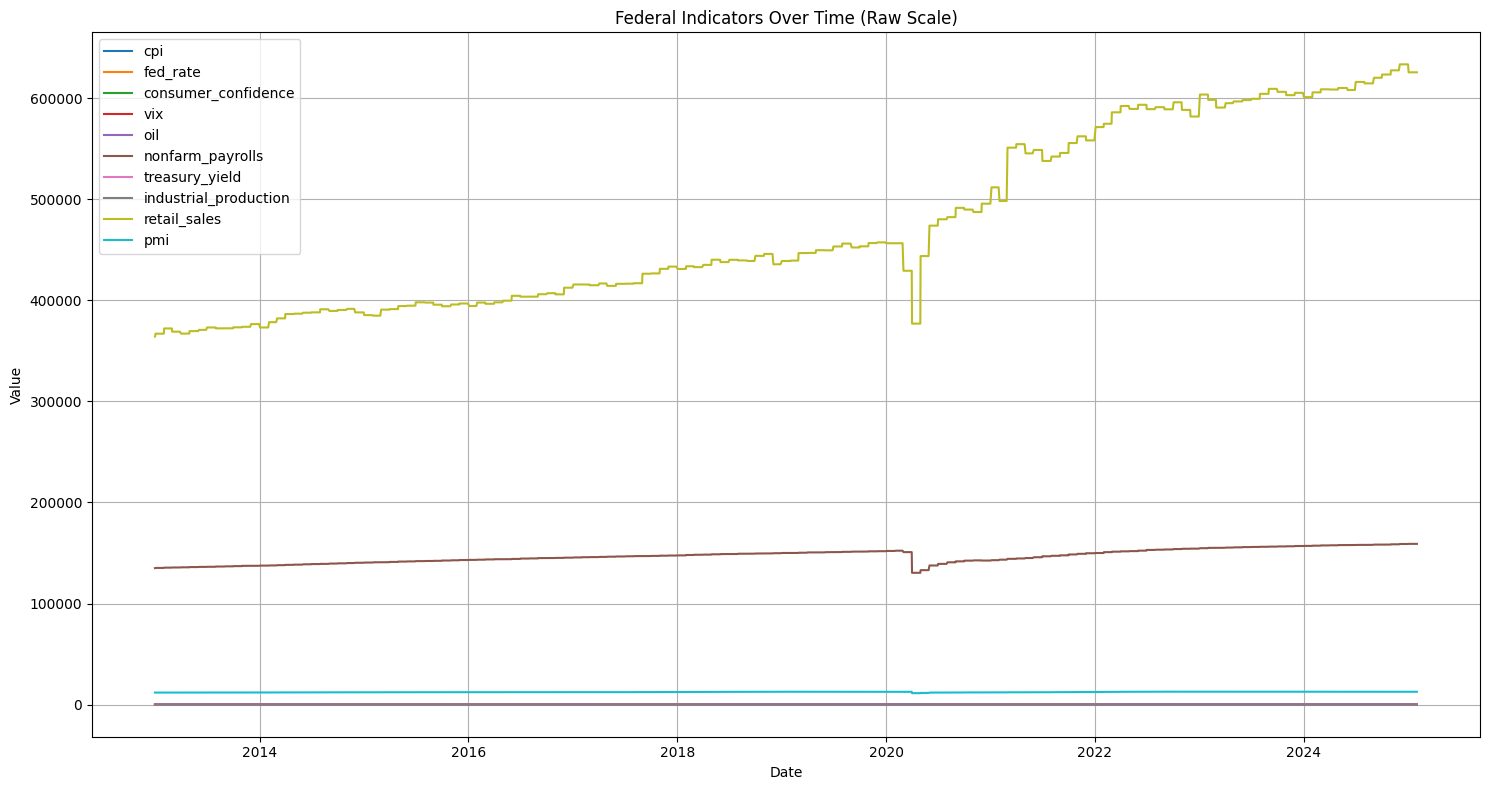

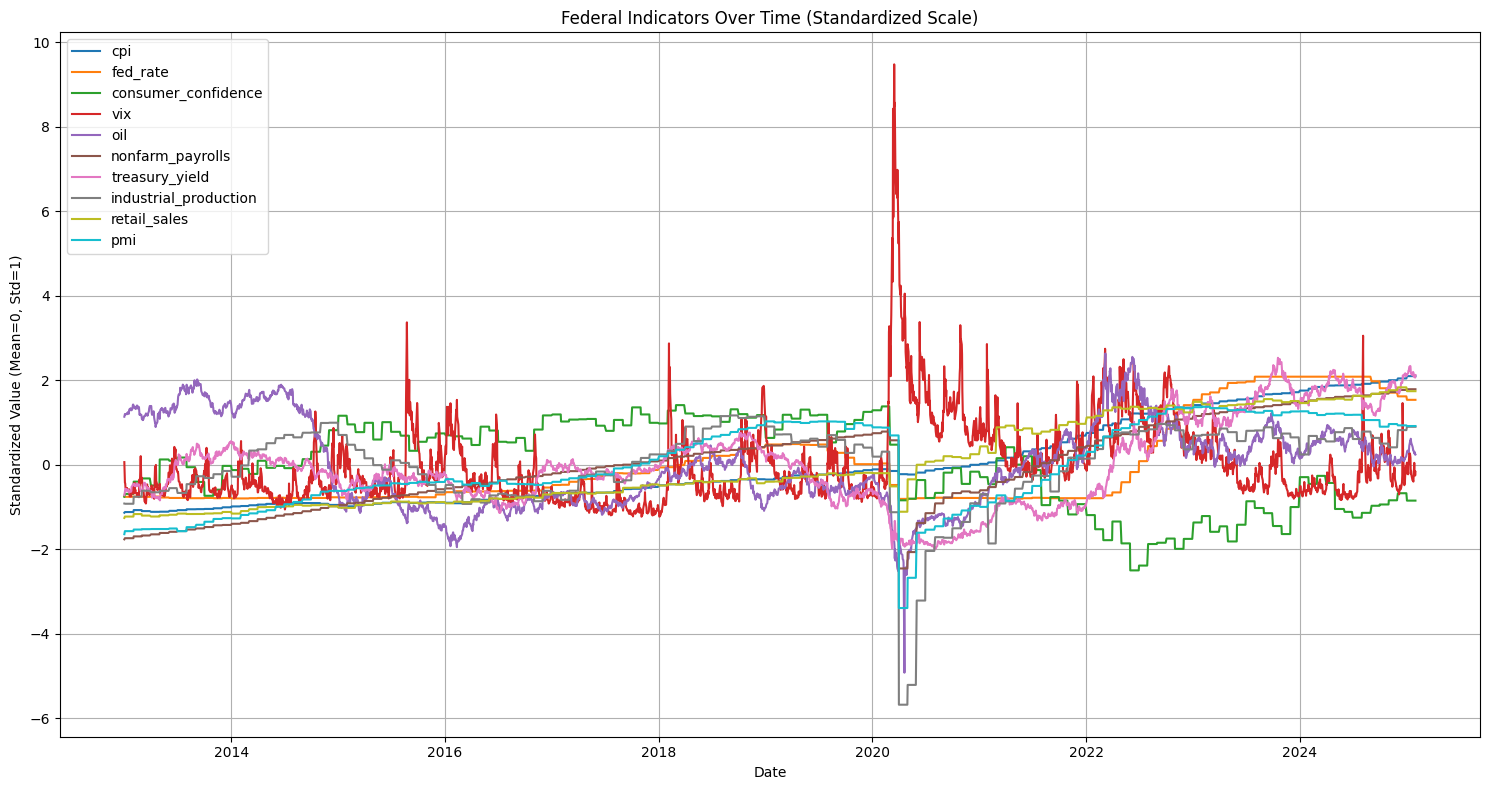

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

fed_date = stock_macro_fed_df[[
    'date', 'cpi', 'fed_rate', 'consumer_confidence', 'vix', 'oil',
    'nonfarm_payrolls', 'treasury_yield', 'industrial_production', 'retail_sales', 'pmi'
]]

# Set 'date' as index for easier plotting
if 'date' in fed_date.columns:
    fed_date['date'] = pd.to_datetime(fed_date['date'])
    fed_date.set_index('date', inplace=True)
else:
    print("Error: 'date' column not found in fed_date DataFrame.")
    exit()

# --- Assess Data Ranges and Scales ---
print("Data Ranges and Scales:")
for column in fed_date.columns:
    print(f"- {column}: Range [{fed_date[column].min():.2f}, {fed_date[column].max():.2f}], Scale: {np.ptp(fed_date[column]):.2f}")

# --- Updated Plotting with Adjusted Scale ---
plt.figure(figsize=(15, 8))  # Increased figure size for better readability

for column in fed_date.columns:
    plt.plot(fed_date.index, fed_date[column], label=column)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Federal Indicators Over Time (Raw Scale)')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Plotting with Standardized Scale ---
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
fed_date_scaled = fed_date.copy()
fed_date_scaled[fed_date_scaled.columns] = scaler.fit_transform(fed_date_scaled)

plt.figure(figsize=(15, 8))

for column in fed_date_scaled.columns:
    plt.plot(fed_date_scaled.index, fed_date_scaled[column], label=column)

plt.xlabel('Date')
plt.ylabel('Standardized Value (Mean=0, Std=1)')
plt.title('Federal Indicators Over Time (Standardized Scale)')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Macro Indicators Over Time 

/var/folders/sg/6fn_sqtx2q9b2k4xrpxrcf180000gn/T/ipykernel_83871/119033831.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  macro_date['date'] = pd.to_datetime(macro_date['date'])


Data Ranges and Scales:
- S&P500_Index: Range [1426.19, 6118.71], Scale: 4692.52
- Dow_Jones_Index: Range [13104.14, 45014.04], Scale: 31909.90
- NASDAQ_Composite: Range [3019.51, 20173.89], Scale: 17154.38
- Russell2000_Index: Range [849.35, 2442.74], Scale: 1593.39
- VIX_Index: Range [9.14, 82.69], Scale: 73.55
- Dollar_Index_DXY: Range [79.13, 114.11], Scale: 34.98
- Gold_Futures: Range [1050.80, 2823.00], Scale: 1772.20
- WTI_Oil_Futures: Range [-37.63, 123.70], Scale: 161.33
- Copper_Futures: Range [1.94, 5.12], Scale: 3.18
- Brent_Crude_Futures: Range [19.33, 127.98], Scale: 108.65
- Tech_Sector_ETF: Range [24.50, 241.40], Scale: 216.90
- Energy_Sector_ETF: Range [19.08, 95.71], Scale: 76.63
- Financial_Sector_ETF: Range [10.60, 51.58], Scale: 40.98
- ConsumerDiscretionary_ETF: Range [41.11, 238.32], Scale: 197.21
- Lithium_ETF: Range [15.06, 93.35], Scale: 78.29
- Semiconductor_ETF: Range [14.07, 280.03], Scale: 265.96
- Electricity_Proxy: Range [23.22, 81.67], Scale: 58.45


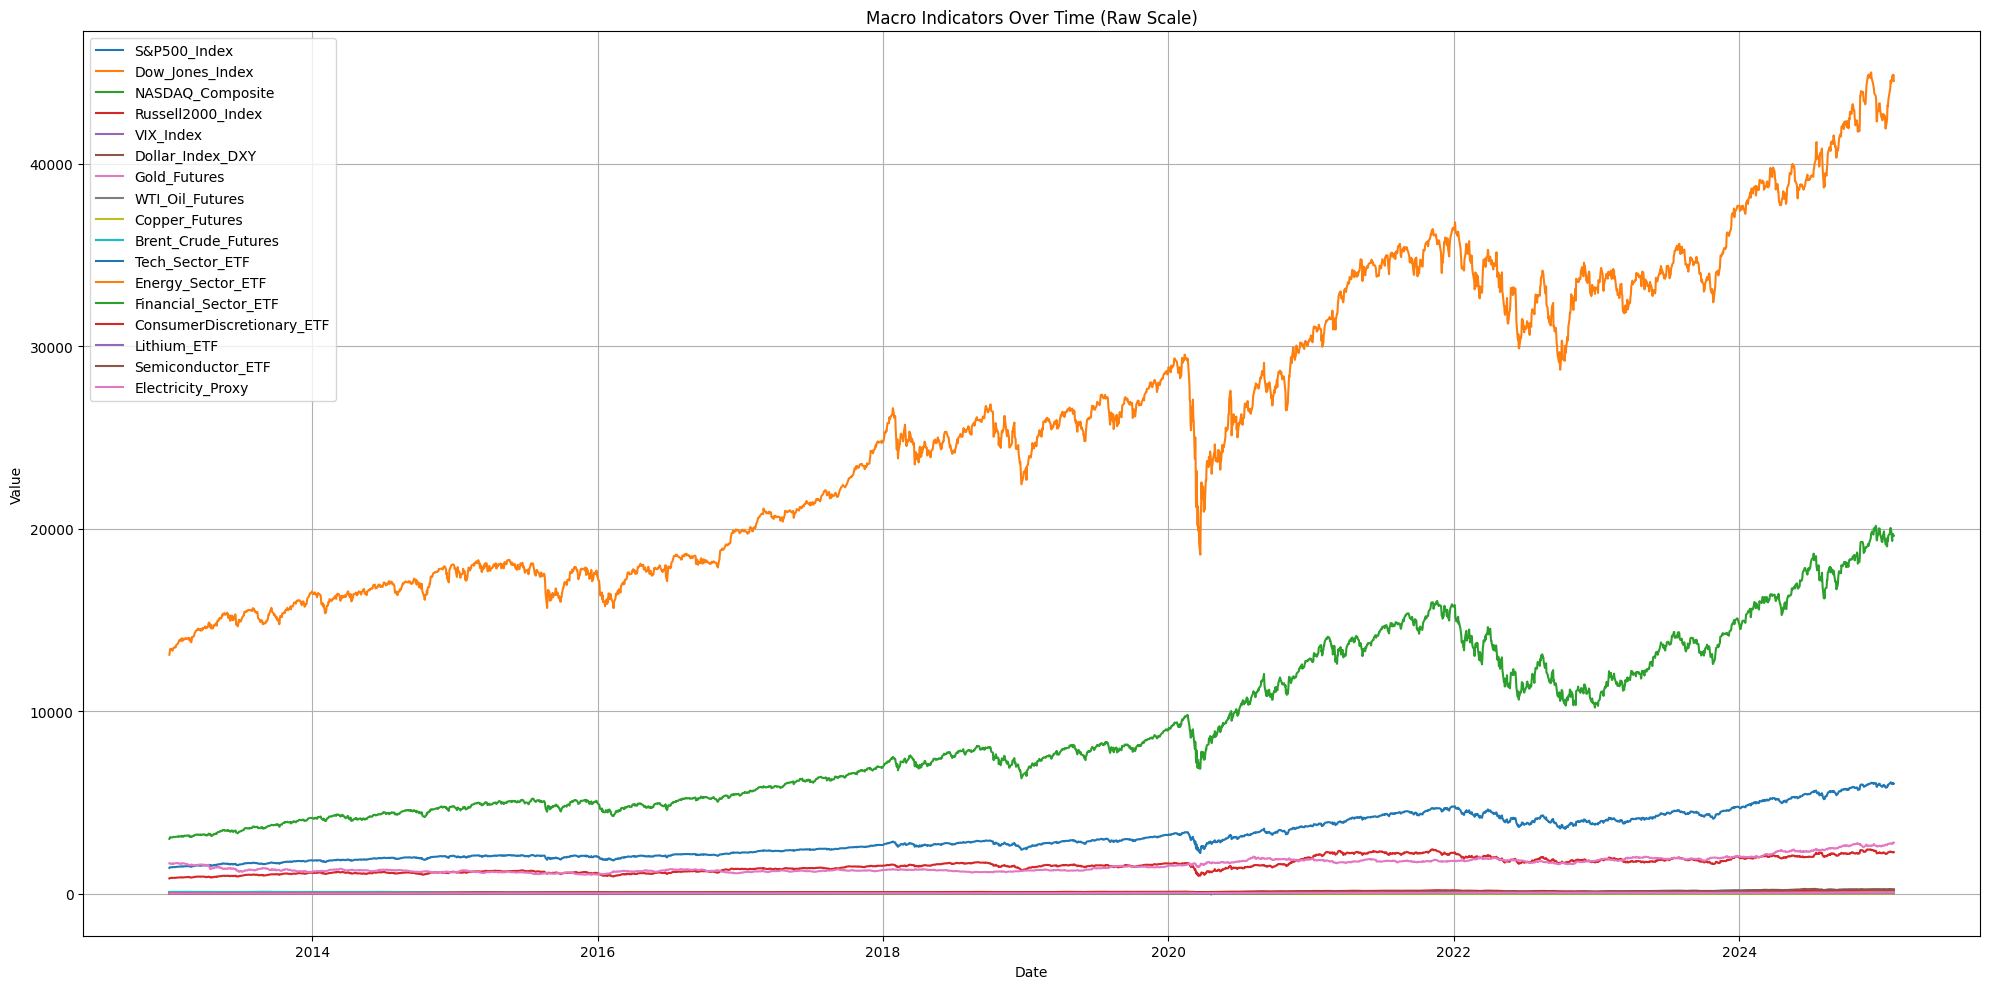

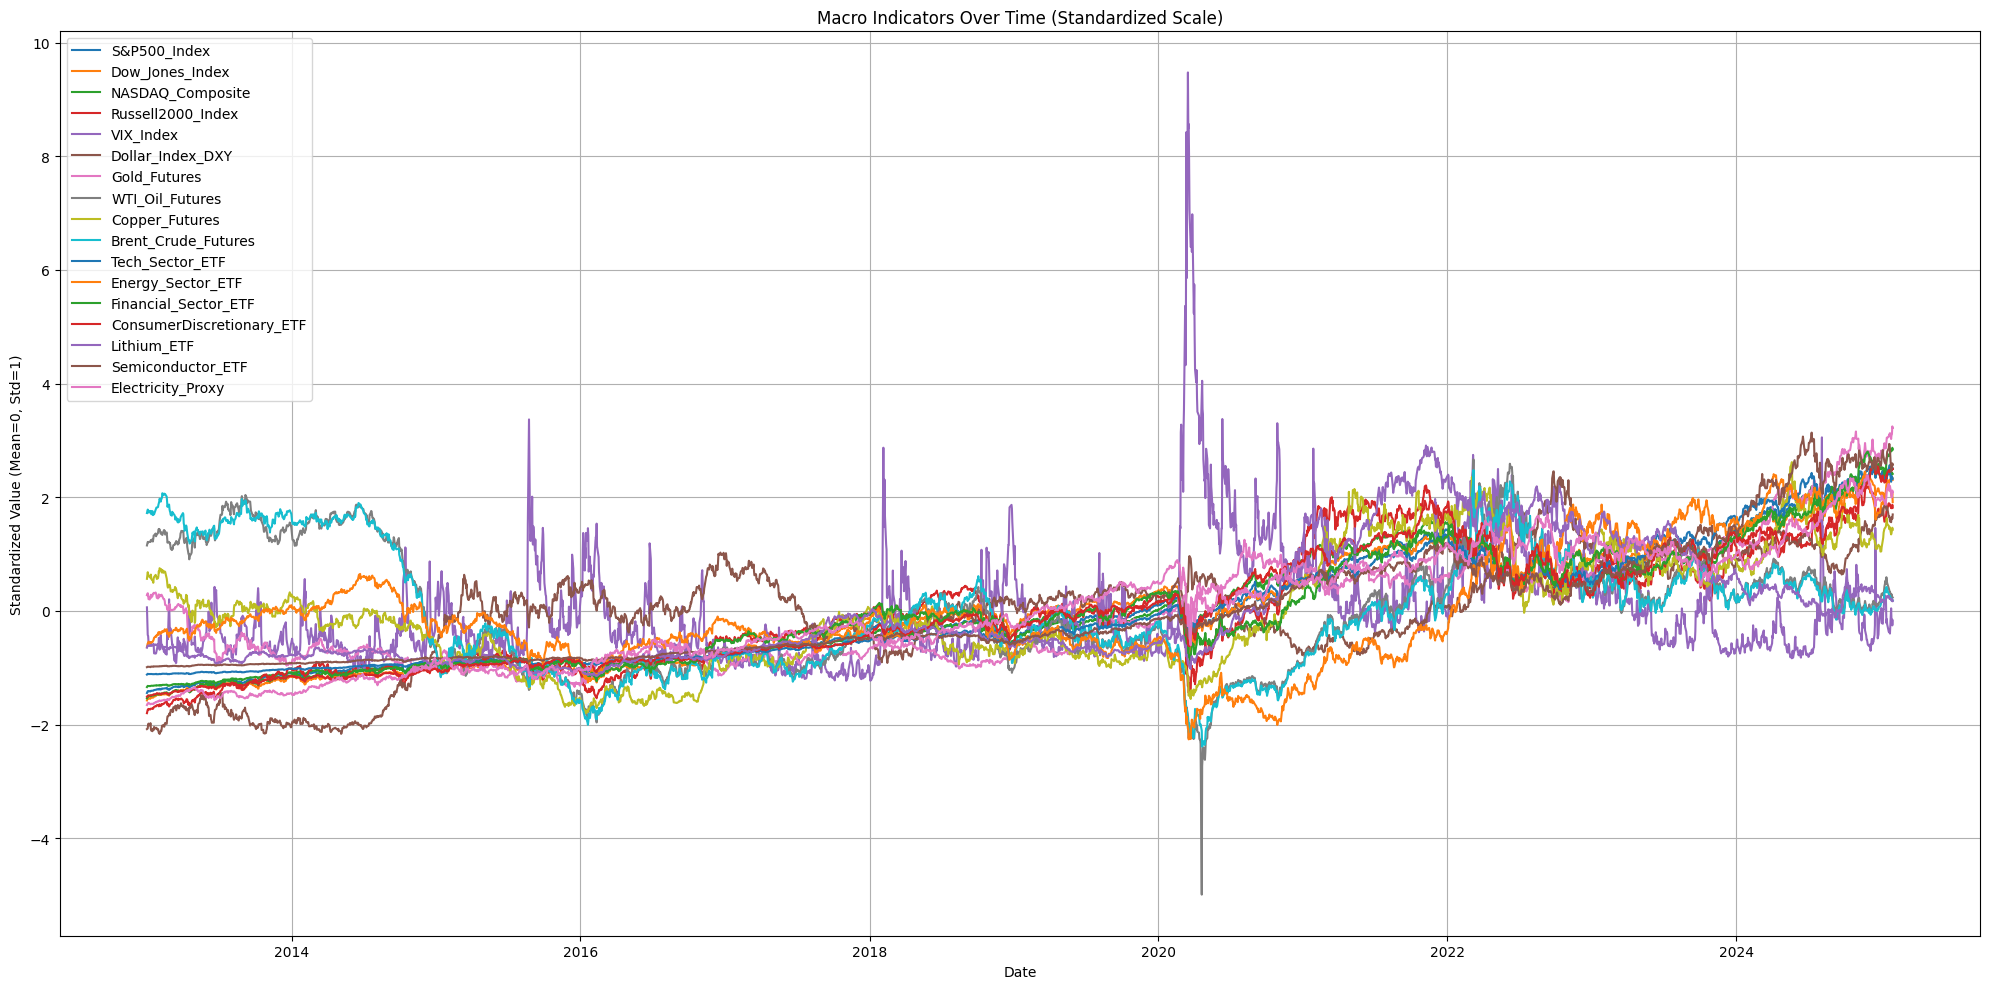

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

macro_date = stock_macro_fed_df[[
    'date', 'S&P500_Index', 'Dow_Jones_Index', 'NASDAQ_Composite',
    'Russell2000_Index', 'VIX_Index', 'Dollar_Index_DXY', 'Gold_Futures',
    'WTI_Oil_Futures', 'Copper_Futures', 'Brent_Crude_Futures',
    'Tech_Sector_ETF', 'Energy_Sector_ETF', 'Financial_Sector_ETF',
    'ConsumerDiscretionary_ETF', 'Lithium_ETF', 'Semiconductor_ETF',
    'Electricity_Proxy'
]]

# Set 'date' as index for easier plotting
if 'date' in macro_date.columns:
    macro_date['date'] = pd.to_datetime(macro_date['date'])
    macro_date.set_index('date', inplace=True)
else:
    print("Error: 'date' column not found in macro_date DataFrame.")
    exit()

# --- Assess Data Ranges and Scales ---
print("Data Ranges and Scales:")
for column in macro_date.columns:
    print(f"- {column}: Range [{macro_date[column].min():.2f}, {macro_date[column].max():.2f}], Scale: {np.ptp(macro_date[column]):.2f}")

# --- Updated Plotting with Adjusted Scale ---
plt.figure(figsize=(20, 10))  # Increased figure size for better readability

for column in macro_date.columns:
    plt.plot(macro_date.index, macro_date[column], label=column)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Macro Indicators Over Time (Raw Scale)')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Plotting with Standardized Scale ---
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
macro_date_scaled = macro_date.copy()
macro_date_scaled[macro_date_scaled.columns] = scaler.fit_transform(macro_date_scaled)

plt.figure(figsize=(20, 10))

for column in macro_date_scaled.columns:
    plt.plot(macro_date_scaled.index, macro_date_scaled[column], label=column)

plt.xlabel('Date')
plt.ylabel('Standardized Value (Mean=0, Std=1)')
plt.title('Macro Indicators Over Time (Standardized Scale)')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Feature Engineering

In [22]:
# -------------------------------------------------------
# 📦 Feature Engineering
# -------------------------------------------------------

# 🛠️ 1. Investment Total and Individual Stock Investment Ratios
# -------------------------------------------------------

# ➡️ Calculate total daily investment across top 10 tech stocks
stock_macro_fed_df["invest_total"] = (
    stock_macro_fed_df["invest_AAPL"] + stock_macro_fed_df["invest_MSFT"] + stock_macro_fed_df["invest_GOOGL"] +
    stock_macro_fed_df["invest_NVDA"] + stock_macro_fed_df["invest_AMZN"] + stock_macro_fed_df["invest_META"] +
    stock_macro_fed_df["invest_TSLA"] + stock_macro_fed_df["invest_AVGO"] + stock_macro_fed_df["invest_AMD"] +
    stock_macro_fed_df["invest_CRM"]
)

# ➡️ Calculate each company's investment share (ratio)
for stock in ['AAPL', 'MSFT', 'GOOGL', 'NVDA', 'AMZN', 'META', 'TSLA', 'AVGO', 'AMD', 'CRM']:
    stock_macro_fed_df[f"invest_{stock}_ratio"] = stock_macro_fed_df[f"invest_{stock}"] / stock_macro_fed_df["invest_total"]

# -------------------------------------------------------
# 🛠️ 2. Time Features Extraction
# -------------------------------------------------------

# ➡️ Extract time-based features from 'date'
stock_macro_fed_df['day_of_week'] = stock_macro_fed_df['date'].dt.dayofweek        # 0 = Monday, 6 = Sunday
stock_macro_fed_df['month'] = stock_macro_fed_df['date'].dt.month                  # 1 = January, 12 = December
stock_macro_fed_df['week_number'] = stock_macro_fed_df['date'].dt.isocalendar().week  # ISO week number (1-53)
stock_macro_fed_df['is_month_end'] = stock_macro_fed_df['date'].dt.is_month_end.astype(int)  # 1 if last trading day of month

# -------------------------------------------------------
# 🛠️ 3. Set Up DataFrame for Feature Engineering
# -------------------------------------------------------

# ➡️ Make a working copy
df = stock_macro_fed_df.copy()

# ➡️ Ensure 'date' is datetime type and set it as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# -------------------------------------------------------
# 🛠️ 4. First Differencing for Macroeconomic and Indices Variables
# -------------------------------------------------------

# ➡️ Columns related to macroeconomics, indices, ETFs
macro_and_indices_cols = [
    'cpi', 'fed_rate', 'consumer_confidence', 'vix', 'oil', 'nonfarm_payrolls', 'treasury_yield',
    'industrial_production', 'retail_sales', 'pmi',
    'S&P500_Index', 'Dow_Jones_Index', 'NASDAQ_Composite', 'Russell2000_Index', 'VIX_Index',
    'Dollar_Index_DXY', 'Gold_Futures', 'WTI_Oil_Futures', 'Copper_Futures', 'Brent_Crude_Futures',
    'Tech_Sector_ETF', 'Energy_Sector_ETF', 'Financial_Sector_ETF', 'ConsumerDiscretionary_ETF',
    'Lithium_ETF', 'Semiconductor_ETF', 'Electricity_Proxy'
]

# ➡️ Apply first differencing to remove trend
for col in macro_and_indices_cols:
    if col in df.columns:
        df[f'{col}_diff'] = df[col].diff()

# -------------------------------------------------------
# 🛠️ 5. Stock Price Feature Engineering
# -------------------------------------------------------

stocks = ['AAPL', 'MSFT', 'GOOGL', 'NVDA', 'AMZN', 'META', 'TSLA', 'AVGO', 'AMD', 'CRM']

for stock in stocks:
    for field in ['close', 'open', 'high', 'low']:
        col = f'{field}_{stock}'
        if col in df.columns:
            # ➡️ Differencing for stationarity
            df[f'{col}_diff'] = df[col].diff()
            # ➡️ Rolling mean and std dev
            df[f'{col}_rolling_mean_5'] = df[col].rolling(window=5).mean()
            df[f'{col}_rolling_std_5'] = df[col].rolling(window=5).std()
            df[f'{col}_rolling_mean_20'] = df[col].rolling(window=20).mean()
            df[f'{col}_rolling_std_20'] = df[col].rolling(window=20).std()
            # ➡️ Create lag features
            for lag in [1, 3, 5, 10]:
                df[f'{col}_lag_{lag}'] = df[col].shift(lag)

    # ➡️ Technical Indicators (RSI and MACD)
    close_col = f'close_{stock}'
    if close_col in df.columns:
        df[f'{stock}_RSI'] = ta.rsi(df[close_col], length=14)
        macd = ta.macd(df[close_col])
        if macd is not None:
            df[f'{stock}_MACD'] = macd['MACD_12_26_9']
            df[f'{stock}_MACD_signal'] = macd['MACDs_12_26_9']
            df[f'{stock}_MACD_hist'] = macd['MACDh_12_26_9']

    # ➡️ Volume-based Features
    vol_col = f'volume_{stock}'
    if vol_col in df.columns:
        df[f'{vol_col}_log'] = np.log1p(df[vol_col])
        df[f'{vol_col}_diff'] = df[f'{vol_col}_log'].diff()

    # ➡️ Price Delta, Avg, Ratio, Investment Differencing
    for suffix in ['delta_price', 'avg_price', 'price_ratio', 'invest']:
        derived_col = f'{suffix}_{stock}'
        if derived_col in df.columns:
            df[f'{derived_col}_diff'] = df[derived_col].diff()

# -------------------------------------------------------
# 🛠️ 6. Portfolio Level Investment Features
# -------------------------------------------------------

portfolio_cols = [
    'invest_total', 'invest_AAPL_ratio', 'invest_MSFT_ratio', 'invest_GOOGL_ratio',
    'invest_NVDA_ratio', 'invest_AMZN_ratio', 'invest_META_ratio',
    'invest_TSLA_ratio', 'invest_AVGO_ratio', 'invest_AMD_ratio', 'invest_CRM_ratio'
]

# ➡️ Apply first differencing to investment ratios
for col in portfolio_cols:
    if col in df.columns:
        df[f'{col}_diff'] = df[col].diff()

# -------------------------------------------------------
# 🛠️ 7. Additional Time and Investment Trend Features
# -------------------------------------------------------


# ➡️ Quarter, Year, Quarter-End, Year-End flags
df['quarter'] = df.index.quarter
df['year'] = df.index.year
df['month'] = df.index.month
df['is_quarter_end'] = df.index.is_quarter_end.astype(int)
df['is_year_end'] = df.index.is_year_end.astype(int)

#(Optional) Standardize Day of Week
# If 'day_of_week' is a string like "Monday", map to numeric
day_mapping = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2,
               'Thursday': 3, 'Friday': 4}
if df['day_of_week'].dtype == 'object':
    df['day_of_week_num'] = df['day_of_week'].map(day_mapping)


# ➡️ Lagged and Rolling Investment Total
df['invest_total_lag_1'] = df['invest_total'].shift(1)
df['invest_total_diff'] = df['invest_total'].diff()
df['invest_total_rolling_mean_5'] = df['invest_total'].rolling(window=5).mean()

# -------------------------------------------------------
# 🧹 8. Final Cleaning Step
# -------------------------------------------------------

# ➡️ Drop rows with NaN values caused by differencing, rolling, and shifting
df.dropna(inplace=True)


/var/folders/sg/6fn_sqtx2q9b2k4xrpxrcf180000gn/T/ipykernel_83871/3693771881.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_rolling_mean_20'] = df[col].rolling(window=20).mean()
/var/folders/sg/6fn_sqtx2q9b2k4xrpxrcf180000gn/T/ipykernel_83871/3693771881.py:76: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_rolling_std_20'] = df[col].rolling(window=20).std()
/var/folders/sg/6fn_sqtx2q9b2k4xrpxrcf180000gn/T/ipykernel_83871/3693771881.py:79: PerformanceWarning: DataFrame is highly fragmented.  This is usua

# Correlation Matrix

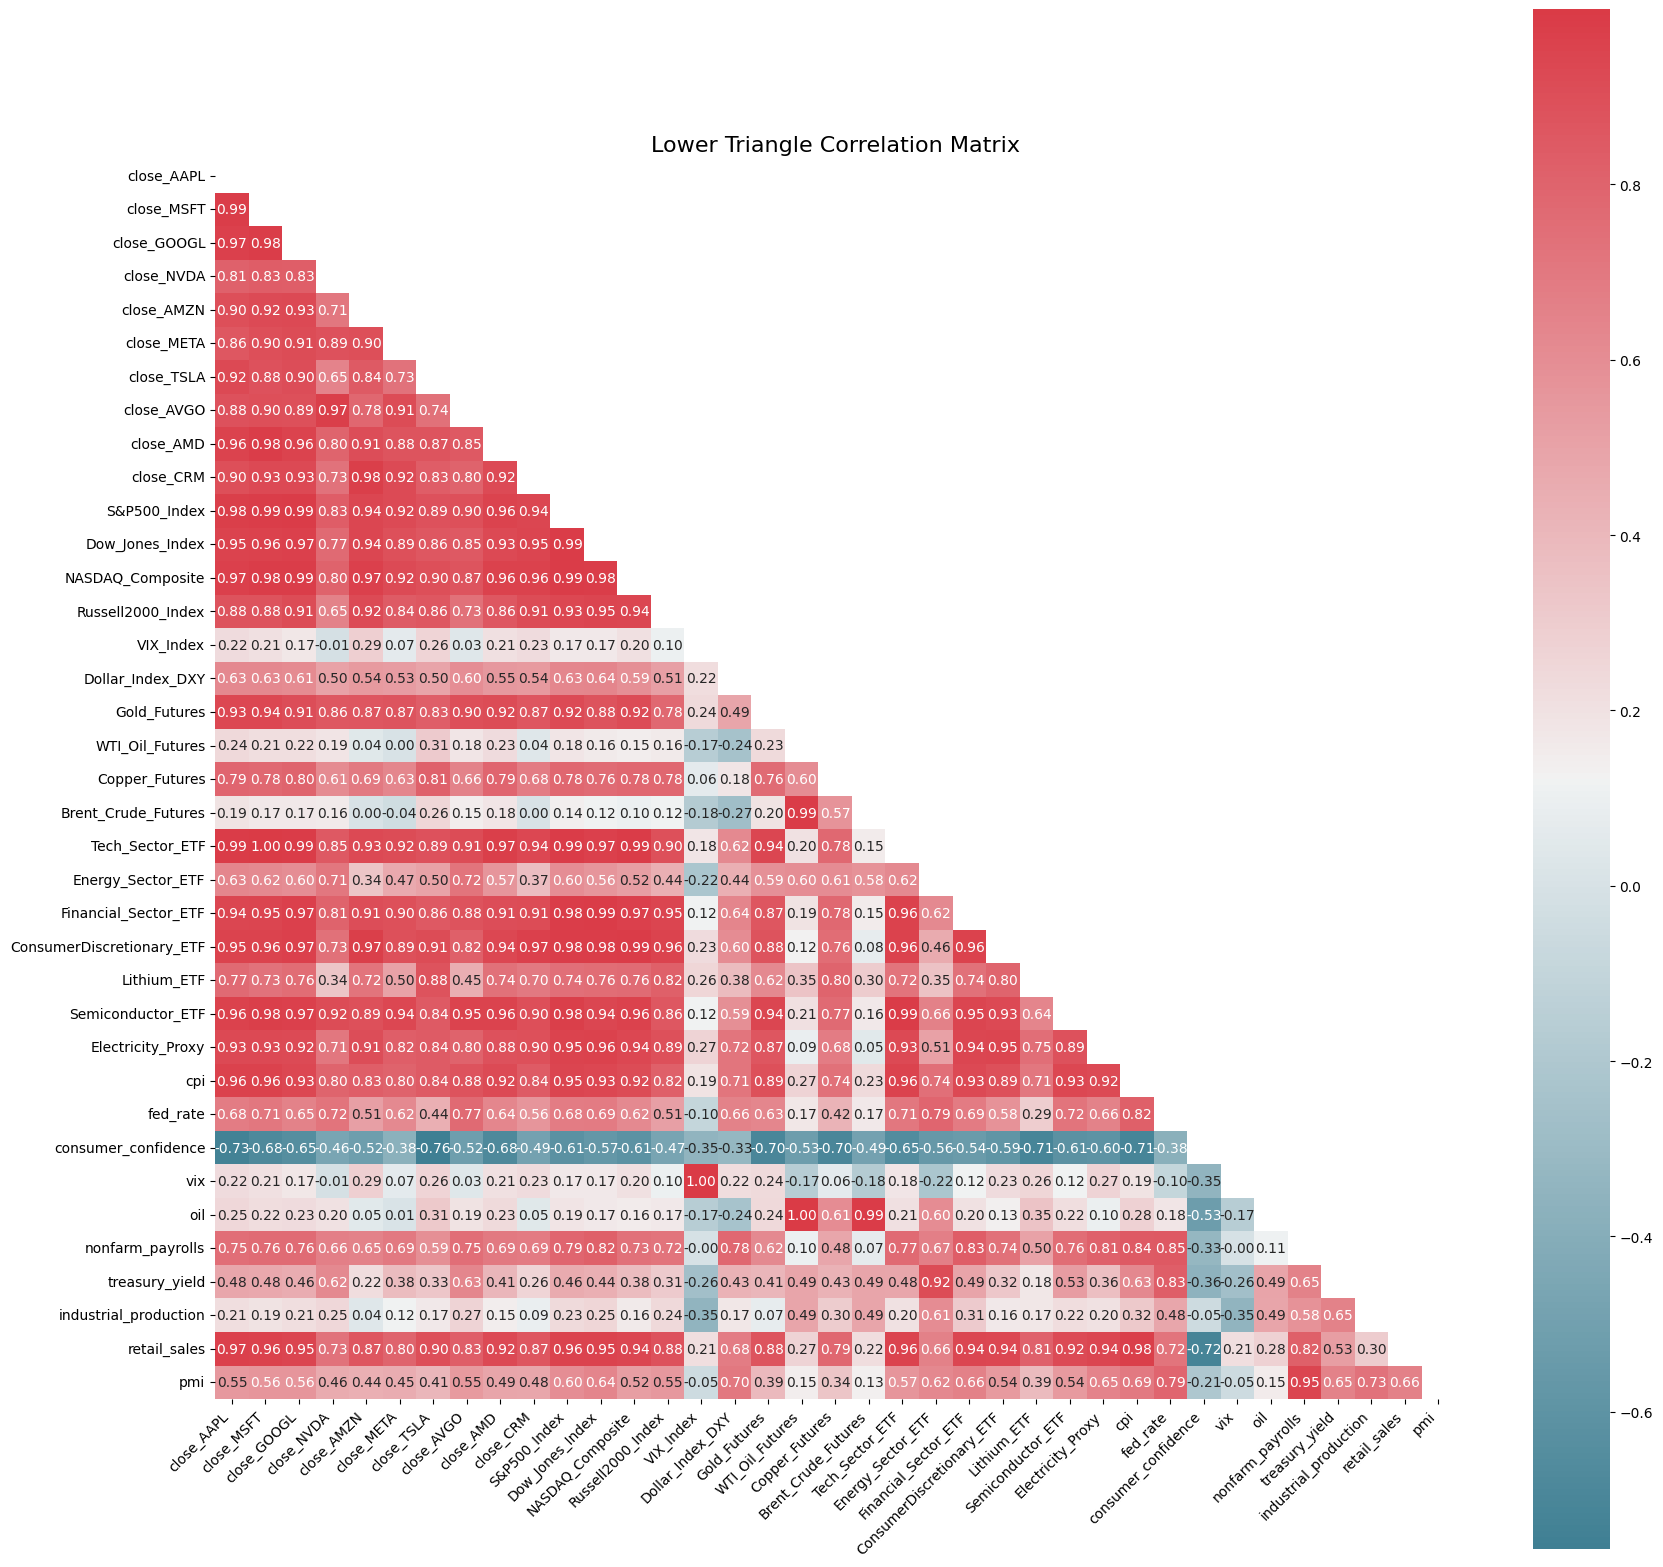


Styled Correlation Matrix (Lower Triangle):



,close_AAPL,close_MSFT,close_GOOGL,close_NVDA,close_AMZN,close_META,close_TSLA,close_AVGO,close_AMD,close_CRM,S&P500_Index,Dow_Jones_Index,NASDAQ_Composite,Russell2000_Index,VIX_Index,Dollar_Index_DXY,Gold_Futures,WTI_Oil_Futures,Copper_Futures,Brent_Crude_Futures,Tech_Sector_ETF,Energy_Sector_ETF,Financial_Sector_ETF,ConsumerDiscretionary_ETF,Lithium_ETF,Semiconductor_ETF,Electricity_Proxy,cpi,fed_rate,consumer_confidence,vix,oil,nonfarm_payrolls,treasury_yield,industrial_production,retail_sales,pmi
close_AAPL,1.00,0.99,0.97,0.81,0.90,0.86,0.92,0.88,0.96,0.90,0.98,0.95,0.97,0.88,0.22,0.63,0.93,0.24,0.79,0.19,0.99,0.63,0.94,0.95,0.77,0.96,0.93,0.96,0.68,-0.73,0.22,0.25,0.75,0.48,0.21,0.97,0.55
close_MSFT,0.99,1.00,0.98,0.83,0.92,0.90,0.88,0.90,0.98,0.93,0.99,0.96,0.98,0.88,0.21,0.63,0.94,0.21,0.78,0.17,1.00,0.62,0.95,0.96,0.73,0.98,0.93,0.96,0.71,-0.68,0.21,0.22,0.76,0.48,0.19,0.96,0.56
close_GOOGL,0.97,0.98,1.00,0.83,0.93,0.91,0.90,0.89,0.96,0.93,0.99,0.97,0.99,0.91,0.17,0.61,0.91,0.22,0.80,0.17,0.99,0.60,0.97,0.97,0.76,0.97,0.92,0.93,0.65,-0.65,0.17,0.23,0.76,0.46,0.21,0.95,0.56
close_NVDA,0.81,0.83,0.83,1.00,0.71,0.89,0.65,0.97,0.80,0.73,0.83,0.77,0.80,0.65,-0.01,0.50,0.86,0.19,0.61,0.16,0.85,0.71,0.81,0.73,0.34,0.92,0.71,0.80,0.72,-0.46,-0.01,0.20,0.66,0.62,0.25,0.73,0.46
close_AMZN,0.90,0.92,0.93,0.71,1.00,0.90,0.84,0.78,0.91,0.98,0.94,0.94,0.97,0.92,0.29,0.54,0.87,0.04,0.69,0.00,0.93,0.34,0.91,0.97,0.72,0.89,0.91,0.83,0.51,-0.52,0.29,0.05,0.65,0.22,0.04,0.87,0.44
close_META,0.86,0.90,0.91,0.89,0.90,1.00,0.73,0.91,0.88,0.92,0.92,0.89,0.92,0.84,0.07,0.53,0.87,0.00,0.63,-0.04,0.92,0.47,0.90,0.89,0.50,0.94,0.82,0.80,0.62,-0.38,0.07,0.01,0.69,0.38,0.12,0.80,0.45
close_TSLA,0.92,0.88,0.90,0.65,0.84,0.73,1.00,0.74,0.87,0.83,0.89,0.86,0.90,0.86,0.26,0.50,0.83,0.31,0.81,0.26,0.89,0.50,0.86,0.91,0.88,0.84,0.84,0.84,0.44,-0.76,0.26,0.31,0.59,0.33,0.17,0.90,0.41
close_AVGO,0.88,0.90,0.89,0.97,0.78,0.91,0.74,1.00,0.85,0.80,0.90,0.85,0.87,0.73,0.03,0.60,0.90,0.18,0.66,0.15,0.91,0.72,0.88,0.82,0.45,0.95,0.80,0.88,0.77,-0.52,0.03,0.19,0.75,0.63,0.27,0.83,0.55
close_AMD,0.96,0.98,0.96,0.80,0.91,0.88,0.87,0.85,1.00,0.92,0.96,0.93,0.96,0.86,0.21,0.55,0.92,0.23,0.79,0.18,0.97,0.57,0.91,0.94,0.74,0.96,0.88,0.92,0.64,-0.68,0.21,0.23,0.69,0.41,0.15,0.92,0.49
close_CRM,0.90,0.93,0.93,0.73,0.98,0.92,0.83,0.80,0.92,1.00,0.94,0.95,0.96,0.91,0.23,0.54,0.87,0.04,0.68,0.00,0.94,0.37,0.91,0.97,0.70,0.90,0.90,0.84,0.56,-0.49,0.23,0.05,0.69,0.26,0.09,0.87,0.48


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

check_corr_df = df[[
    'close_AAPL', 'close_MSFT', 'close_GOOGL', 'close_NVDA', 'close_AMZN',
    'close_META', 'close_TSLA', 'close_AVGO', 'close_AMD', 'close_CRM',
    'S&P500_Index', 'Dow_Jones_Index', 'NASDAQ_Composite',
    'Russell2000_Index', 'VIX_Index', 'Dollar_Index_DXY', 'Gold_Futures',
    'WTI_Oil_Futures', 'Copper_Futures', 'Brent_Crude_Futures',
    'Tech_Sector_ETF', 'Energy_Sector_ETF', 'Financial_Sector_ETF',
    'ConsumerDiscretionary_ETF', 'Lithium_ETF', 'Semiconductor_ETF',
    'Electricity_Proxy',
    'cpi', 'fed_rate', 'consumer_confidence', 'vix', 'oil',
    'nonfarm_payrolls', 'treasury_yield', 'industrial_production',
    'retail_sales', 'pmi'
]]

corr_df = check_corr_df.corr()

# 1. Create a Mask for the Upper Triangle
mask = np.triu(np.ones_like(corr_df, dtype=bool))

# 2. Create a Styled Correlation Matrix with Lower Triangle and Meaningful Colors
def styled_lower_triangle_heatmap(df, title="Correlation Matrix"):
    """
    Displays a styled correlation matrix with only the lower triangle visible.

    Args:
        df (pd.DataFrame): The correlation matrix.
        title (str, optional): The title of the heatmap. Defaults to "Correlation Matrix".
    """

    styled_df = df.style.format(precision=2).background_gradient(
        cmap=sns.diverging_palette(220, 10, as_cmap=True),  # Use a diverging color palette
        axis=None,
    ).set_properties(**{'font-size': '8pt'})  # Adjust font size as needed

    # Apply the mask to hide the upper triangle (does not work directly with style)
    masked_df = df.copy()
    masked_df[mask] = np.nan  # Replace upper triangle with NaN

    # Convert to a DataFrame suitable for display (including index as a column)
    display_df = masked_df.reset_index().melt('index')
    display_df.dropna(inplace=True)  # Remove NaN values

    # Create the heatmap using seaborn for better control
    plt.figure(figsize=(20, 20))  # Adjust figure size as needed
    sns.heatmap(
        masked_df,
        annot=True,  # Display correlation values in the heatmap
        fmt=".2f",   # Format of the annotations
        cmap=sns.diverging_palette(220, 10, as_cmap=True),
        mask=mask,  # Apply the mask in seaborn
        cbar=True,  # Show the color bar
        square=True, # Ensure the heatmap cells are square
    )
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
    plt.yticks(rotation=0)
    plt.show()

    return styled_df

styled_corr_df = styled_lower_triangle_heatmap(corr_df, title="Lower Triangle Correlation Matrix")

# 3. Print the Styled Correlation Matrix (Table)
print("\nStyled Correlation Matrix (Lower Triangle):\n")
display(styled_corr_df)  # Use display() in a notebook environment

# 📦 Advanced Time Series Decomposition (Trend, Seasonality, Residuals)

In [24]:
# -------------------------------------------------------
# 📦 Advanced Time Series Decomposition: Trend, Seasonality, Residual
# -------------------------------------------------------

from statsmodels.tsa.seasonal import STL

# --------------------------
# 🛠️ Parameters
# --------------------------

# ➡️ Choose important columns to decompose (you can expand this list)
columns_to_decompose = [
    'close_AAPL', 'close_MSFT', 'close_GOOGL', 'close_NVDA', 'close_AMZN',
    'close_META', 'close_TSLA', 'close_AVGO', 'close_AMD', 'close_CRM',
    'S&P500_Index', 'Dow_Jones_Index', 'NASDAQ_Composite',
    'Russell2000_Index', 'VIX_Index', 'Dollar_Index_DXY', 'Gold_Futures',
    'WTI_Oil_Futures', 'Copper_Futures', 'Brent_Crude_Futures',
    'Tech_Sector_ETF', 'Energy_Sector_ETF', 'Financial_Sector_ETF',
    'ConsumerDiscretionary_ETF', 'Lithium_ETF', 'Semiconductor_ETF',
    'Electricity_Proxy',
    'cpi', 'fed_rate', 'consumer_confidence', 'vix', 'oil',
    'nonfarm_payrolls', 'treasury_yield', 'industrial_production',
    'retail_sales', 'pmi'
]

# ➡️ Set seasonality period
# (252 trading days ≈ 1 year seasonality for stock data)
seasonal_period = 252

# --------------------------
# 🛠️ Decomposition
# --------------------------

# Loop through each selected feature
for col in columns_to_decompose:
    if col in df.columns:
        try:
            # ➡️ Apply STL decomposition
            stl = STL(df[col].dropna(), period=seasonal_period)
            result = stl.fit()
            
            # ➡️ Save trend, seasonal, and residual components as new columns
            df[f'{col}_trend'] = result.trend
            df[f'{col}_seasonal'] = result.seasonal
            df[f'{col}_residual'] = result.resid
            
            print(f"✅ Decomposed: {col}")
        
        except Exception as e:
            print(f"❌ Error decomposing {col}: {e}")
    else:
        print(f"⚠️ Column not found: {col}")

# --------------------------
# 🧹 Cleaning (optional)
# --------------------------

# ➡️ After decomposition, drop rows with NaN if needed (optional)
df.dropna(inplace=True)
# (Because decomposition will create NaNs at the start and end due to windowing)

/var/folders/sg/6fn_sqtx2q9b2k4xrpxrcf180000gn/T/ipykernel_83871/3986635644.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_trend'] = result.trend
/var/folders/sg/6fn_sqtx2q9b2k4xrpxrcf180000gn/T/ipykernel_83871/3986635644.py:44: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_seasonal'] = result.seasonal
/var/folders/sg/6fn_sqtx2q9b2k4xrpxrcf180000gn/T/ipykernel_83871/3986635644.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

✅ Decomposed: close_AAPL


/var/folders/sg/6fn_sqtx2q9b2k4xrpxrcf180000gn/T/ipykernel_83871/3986635644.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_trend'] = result.trend
/var/folders/sg/6fn_sqtx2q9b2k4xrpxrcf180000gn/T/ipykernel_83871/3986635644.py:44: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_seasonal'] = result.seasonal
/var/folders/sg/6fn_sqtx2q9b2k4xrpxrcf180000gn/T/ipykernel_83871/3986635644.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

✅ Decomposed: close_MSFT
✅ Decomposed: close_GOOGL
✅ Decomposed: close_NVDA


/var/folders/sg/6fn_sqtx2q9b2k4xrpxrcf180000gn/T/ipykernel_83871/3986635644.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_trend'] = result.trend
/var/folders/sg/6fn_sqtx2q9b2k4xrpxrcf180000gn/T/ipykernel_83871/3986635644.py:44: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_seasonal'] = result.seasonal
/var/folders/sg/6fn_sqtx2q9b2k4xrpxrcf180000gn/T/ipykernel_83871/3986635644.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

✅ Decomposed: close_AMZN
✅ Decomposed: close_META
✅ Decomposed: close_TSLA


/var/folders/sg/6fn_sqtx2q9b2k4xrpxrcf180000gn/T/ipykernel_83871/3986635644.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_trend'] = result.trend
/var/folders/sg/6fn_sqtx2q9b2k4xrpxrcf180000gn/T/ipykernel_83871/3986635644.py:44: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_seasonal'] = result.seasonal
/var/folders/sg/6fn_sqtx2q9b2k4xrpxrcf180000gn/T/ipykernel_83871/3986635644.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

✅ Decomposed: close_AVGO
✅ Decomposed: close_AMD


/var/folders/sg/6fn_sqtx2q9b2k4xrpxrcf180000gn/T/ipykernel_83871/3986635644.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_trend'] = result.trend
/var/folders/sg/6fn_sqtx2q9b2k4xrpxrcf180000gn/T/ipykernel_83871/3986635644.py:44: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_seasonal'] = result.seasonal
/var/folders/sg/6fn_sqtx2q9b2k4xrpxrcf180000gn/T/ipykernel_83871/3986635644.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

✅ Decomposed: close_CRM
✅ Decomposed: S&P500_Index


/var/folders/sg/6fn_sqtx2q9b2k4xrpxrcf180000gn/T/ipykernel_83871/3986635644.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_trend'] = result.trend
/var/folders/sg/6fn_sqtx2q9b2k4xrpxrcf180000gn/T/ipykernel_83871/3986635644.py:44: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_seasonal'] = result.seasonal
/var/folders/sg/6fn_sqtx2q9b2k4xrpxrcf180000gn/T/ipykernel_83871/3986635644.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

✅ Decomposed: Dow_Jones_Index
✅ Decomposed: NASDAQ_Composite
✅ Decomposed: Russell2000_Index
✅ Decomposed: VIX_Index
✅ Decomposed: Dollar_Index_DXY
✅ Decomposed: Gold_Futures


/var/folders/sg/6fn_sqtx2q9b2k4xrpxrcf180000gn/T/ipykernel_83871/3986635644.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_trend'] = result.trend
/var/folders/sg/6fn_sqtx2q9b2k4xrpxrcf180000gn/T/ipykernel_83871/3986635644.py:44: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_seasonal'] = result.seasonal
/var/folders/sg/6fn_sqtx2q9b2k4xrpxrcf180000gn/T/ipykernel_83871/3986635644.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

✅ Decomposed: WTI_Oil_Futures
✅ Decomposed: Copper_Futures


/var/folders/sg/6fn_sqtx2q9b2k4xrpxrcf180000gn/T/ipykernel_83871/3986635644.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_trend'] = result.trend
/var/folders/sg/6fn_sqtx2q9b2k4xrpxrcf180000gn/T/ipykernel_83871/3986635644.py:44: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_seasonal'] = result.seasonal
/var/folders/sg/6fn_sqtx2q9b2k4xrpxrcf180000gn/T/ipykernel_83871/3986635644.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

✅ Decomposed: Brent_Crude_Futures
✅ Decomposed: Tech_Sector_ETF
✅ Decomposed: Energy_Sector_ETF


/var/folders/sg/6fn_sqtx2q9b2k4xrpxrcf180000gn/T/ipykernel_83871/3986635644.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_trend'] = result.trend
/var/folders/sg/6fn_sqtx2q9b2k4xrpxrcf180000gn/T/ipykernel_83871/3986635644.py:44: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_seasonal'] = result.seasonal
/var/folders/sg/6fn_sqtx2q9b2k4xrpxrcf180000gn/T/ipykernel_83871/3986635644.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

✅ Decomposed: Financial_Sector_ETF
✅ Decomposed: ConsumerDiscretionary_ETF
✅ Decomposed: Lithium_ETF
✅ Decomposed: Semiconductor_ETF


/var/folders/sg/6fn_sqtx2q9b2k4xrpxrcf180000gn/T/ipykernel_83871/3986635644.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_trend'] = result.trend
/var/folders/sg/6fn_sqtx2q9b2k4xrpxrcf180000gn/T/ipykernel_83871/3986635644.py:44: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_seasonal'] = result.seasonal
/var/folders/sg/6fn_sqtx2q9b2k4xrpxrcf180000gn/T/ipykernel_83871/3986635644.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

✅ Decomposed: Electricity_Proxy
✅ Decomposed: cpi
✅ Decomposed: fed_rate
✅ Decomposed: consumer_confidence
✅ Decomposed: vix
✅ Decomposed: oil
✅ Decomposed: nonfarm_payrolls


/var/folders/sg/6fn_sqtx2q9b2k4xrpxrcf180000gn/T/ipykernel_83871/3986635644.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_trend'] = result.trend
/var/folders/sg/6fn_sqtx2q9b2k4xrpxrcf180000gn/T/ipykernel_83871/3986635644.py:44: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_seasonal'] = result.seasonal
/var/folders/sg/6fn_sqtx2q9b2k4xrpxrcf180000gn/T/ipykernel_83871/3986635644.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

✅ Decomposed: treasury_yield
✅ Decomposed: industrial_production
✅ Decomposed: retail_sales
✅ Decomposed: pmi


/var/folders/sg/6fn_sqtx2q9b2k4xrpxrcf180000gn/T/ipykernel_83871/3986635644.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_trend'] = result.trend
/var/folders/sg/6fn_sqtx2q9b2k4xrpxrcf180000gn/T/ipykernel_83871/3986635644.py:44: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_seasonal'] = result.seasonal
/var/folders/sg/6fn_sqtx2q9b2k4xrpxrcf180000gn/T/ipykernel_83871/3986635644.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

# Stationarity Testing (ADF) for Time Series Modeling

In [25]:
# -------------------------------------------------------
# 📦 Double Stationarity Test: ADF + KPSS for All Columns
# -------------------------------------------------------

from statsmodels.tsa.stattools import adfuller, kpss

# --------------------------
# 🛠️ Parameters
# --------------------------

# ➡️ Columns to test
columns_to_test = df.select_dtypes(include='number').columns.tolist()

# ➡️ Prepare to collect results
stationarity_results = []

# --------------------------
# 🛠️ Testing Loop
# --------------------------

for col in columns_to_test:
    try:
        # ➡️ Drop NaN values
        series = df[col].dropna()

        # --- ADF Test ---
        adf_result = adfuller(series, autolag='AIC')
        adf_pvalue = adf_result[1]
        adf_stationary = adf_pvalue < 0.05  # Stationary if p-value < 0.05

        # --- KPSS Test ---
        kpss_result = kpss(series, regression='c', nlags="auto")
        kpss_pvalue = kpss_result[1]
        kpss_stationary = kpss_pvalue > 0.05  # Stationary if p-value > 0.05

        # --- Final Conclusion ---
        if adf_stationary and kpss_stationary:
            final_conclusion = "Stationary ✅"
        else:
            final_conclusion = "Non-Stationary ❌"

        # ➡️ Append results
        stationarity_results.append({
            'Feature': col,
            'ADF p-value': round(adf_pvalue, 5),
            'ADF Stationary': adf_stationary,
            'KPSS p-value': round(kpss_pvalue, 5),
            'KPSS Stationary': kpss_stationary,
            'Final Conclusion': final_conclusion
        })

    except Exception as e:
        print(f"⚠️ Error testing {col}: {e}")

# --------------------------
# 📜 Convert to DataFrame
# --------------------------

stationarity_df = pd.DataFrame(stationarity_results)

# ➡️ Display results
stationarity_df.sort_values('Final Conclusion', ascending=False).reset_index(drop=True)



/var/folders/sg/6fn_sqtx2q9b2k4xrpxrcf180000gn/T/ipykernel_83871/3524233485.py:32: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series, regression='c', nlags="auto")
/var/folders/sg/6fn_sqtx2q9b2k4xrpxrcf180000gn/T/ipykernel_83871/3524233485.py:32: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series, regression='c', nlags="auto")
/var/folders/sg/6fn_sqtx2q9b2k4xrpxrcf180000gn/T/ipykernel_83871/3524233485.py:32: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series, regression='c', nlags="auto")
/var/folders/sg/6fn_sqtx2q9b2k4xrpxrcf180000gn/T/ipykernel_83871/35242334

,Feature,ADF p-value,ADF Stationary,KPSS p-value,KPSS Stationary,Final Conclusion
0,pmi_residual,0.00000,True,0.10,True,Stationary ✅
1,high_TSLA_diff,0.00000,True,0.10,True,Stationary ✅
2,close_AAPL_diff,0.00000,True,0.10,True,Stationary ✅
3,invest_AAPL_ratio_diff,0.00000,True,0.10,True,Stationary ✅
4,invest_total_diff,0.00000,True,0.10,True,Stationary ✅
...,...,...,...,...,...,...
742,low_GOOGL_rolling_mean_5,0.99581,False,0.01,False,Non-Stationary ❌
743,low_GOOGL_rolling_std_5,0.05656,False,0.01,False,Non-Stationary ❌
744,low_GOOGL_rolling_mean_20,0.99383,False,0.01,False,Non-Stationary ❌
745,low_GOOGL_rolling_std_20,0.03938,True,0.01,False,Non-Stationary ❌


In [26]:
stationarity_df['Final Conclusion'].value_counts()

Final Conclusion
Non-Stationary ❌    524
Stationary ✅        223
Name: count, dtype: int64

# Advanced Stationarity Fix: Second Diff, Residuals, Log Returns

In [27]:
# -------------------------------------------------------
# 🧠 Advanced Stationarity Fix: Second Diff, Residuals, Log Returns
# -------------------------------------------------------

from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import STL
import numpy as np

# -----------------------------------------------
# 1. Detect non-stationary features from previous results
# -----------------------------------------------

# Filter only non-stationary features
non_stationary_cols = stationarity_df[stationarity_df['Final Conclusion'] == 'Non-Stationary ❌']['Feature'].tolist()

# Prepare result collector
fixed_results = []

# -----------------------------------------------
# 2. Define Helper: Run ADF + KPSS and interpret
# -----------------------------------------------

def test_stationarity(series):
    try:
        adf_p = adfuller(series.dropna())[1]
    except:
        adf_p = np.nan
    try:
        kpss_p = kpss(series.dropna(), regression='c', nlags="auto")[1]
    except:
        kpss_p = np.nan
    adf_stat = adf_p < 0.05 if not np.isnan(adf_p) else False
    kpss_stat = kpss_p > 0.05 if not np.isnan(kpss_p) else False
    conclusion = 'Stationary ✅' if adf_stat and kpss_stat else 'Non-Stationary ❌'
    return adf_p, adf_stat, kpss_p, kpss_stat, conclusion

# -----------------------------------------------
# 3. Loop through each non-stationary feature and fix
# -----------------------------------------------

for col in non_stationary_cols:
    try:
        series = df[col].dropna()

        # --- Try log return if column has only positive values
        if (series > 0).all():
            transformed = np.log(series / series.shift(1))
            method = "log_return"

        # --- Otherwise, try second differencing
        else:
            transformed = series.diff().diff()
            method = "second_diff"

        # --- If still looks trended, try residual from STL
        if transformed.dropna().std() == 0 or transformed.isna().mean() > 0.5:
            stl = STL(series, period=252)
            transformed = stl.fit().resid
            method = "stl_residual"

        # --- Run stationarity tests on transformed version
        adf_p, adf_ok, kpss_p, kpss_ok, conclusion = test_stationarity(transformed)

        # --- Append result
        fixed_results.append({
            'Feature': col,
            'Fix Method': method,
            'ADF p-value': round(adf_p, 5) if adf_p is not None else None,
            'ADF Stationary': adf_ok,
            'KPSS p-value': round(kpss_p, 5) if kpss_p is not None else None,
            'KPSS Stationary': kpss_ok,
            'Final Conclusion': conclusion
        })

        # Save transformed back into df (optional)
        df[f'{col}_{method}'] = transformed

    except Exception as e:
        print(f"⚠️ Error processing {col}: {e}")

# -----------------------------------------------
# 4. Display Fixed Result Summary
# -----------------------------------------------

fixed_stationarity_df = pd.DataFrame(fixed_results)
fixed_stationarity_df.sort_values('Final Conclusion', ascending=False).reset_index(drop=True)


/var/folders/sg/6fn_sqtx2q9b2k4xrpxrcf180000gn/T/ipykernel_83871/821009436.py:29: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_p = kpss(series.dropna(), regression='c', nlags="auto")[1]
/var/folders/sg/6fn_sqtx2q9b2k4xrpxrcf180000gn/T/ipykernel_83871/821009436.py:29: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_p = kpss(series.dropna(), regression='c', nlags="auto")[1]
/var/folders/sg/6fn_sqtx2q9b2k4xrpxrcf180000gn/T/ipykernel_83871/821009436.py:29: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_p = kpss(series.dropna(), regression='c', nlags="auto")[1]
/var/folders/sg/6fn_sqtx2q9b2k4xrpxrcf180000gn/T/ipyker

,Feature,Fix Method,ADF p-value,ADF Stationary,KPSS p-value,KPSS Stationary,Final Conclusion
0,close_AAPL,log_return,0.00000,True,0.10000,True,Stationary ✅
1,high_META_lag_5,log_return,0.00000,True,0.10000,True,Stationary ✅
2,volume_META_log,log_return,0.00000,True,0.10000,True,Stationary ✅
3,META_MACD_signal,second_diff,0.00000,True,0.10000,True,Stationary ✅
4,META_MACD,second_diff,0.00000,True,0.10000,True,Stationary ✅
...,...,...,...,...,...,...,...
519,S&P500_Index_trend,log_return,0.00000,True,0.04703,False,Non-Stationary ❌
520,cpi_diff,second_diff,0.00000,True,0.04167,False,Non-Stationary ❌
521,Dollar_Index_DXY_trend,log_return,0.00027,True,0.04572,False,Non-Stationary ❌
522,Gold_Futures_trend,log_return,0.18312,False,0.01000,False,Non-Stationary ❌


In [30]:
stationarity_df['Final Conclusion'].value_counts()

Final Conclusion
Non-Stationary ❌    524
Stationary ✅        223
Name: count, dtype: int64

In [28]:
fixed_stationarity_df['Final Conclusion'].value_counts()

Final Conclusion
Stationary ✅        496
Non-Stationary ❌     28
Name: count, dtype: int64